<a href="https://colab.research.google.com/github/OLAMILEKANSI5/HAMOYE_INTERN/blob/master/HAMOYE_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading in the data
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [4]:
# Taking a look at first 8 rows
df.head(8)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148


In [5]:
df.shape

(144, 2)

In [6]:
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datetime
df.set_index("Month", inplace=True)  #The set_index() function is used to set the DataFrame index using existing columns while inplace modifies the data in place

In [7]:
# Checking out the modified dataframe
df.head(15)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


Text(0, 0.5, 'Passengers')

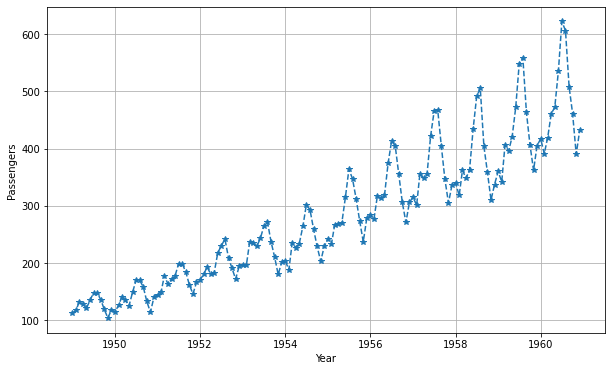

In [8]:
# Plotting a graph showing the distribution of both columns
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [9]:
#check for missing values
df.isnull().values.any()

False

In [10]:
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0) # frac - Fraction of axis items to return, in this case 0.1% of 144 passengers rows
rows['Passengers'] = np.nan # dropping missing values in place
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers'] 
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [11]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

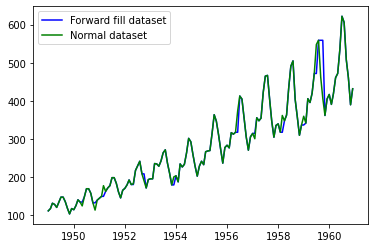

In [12]:
# Let's compare the df_copy_ffill with the main dataframe(df) to check its correlation
airline_1= df
airline_2 = df_copy_ffill
 
# Plot with differently-colored markers.
plt.plot(airline_2 , 'blue', label='Forward fill dataset')
plt.plot( airline_1, 'green', label='Normal dataset')
 
# Create legend.
plt.legend(loc='upper left')

In [13]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

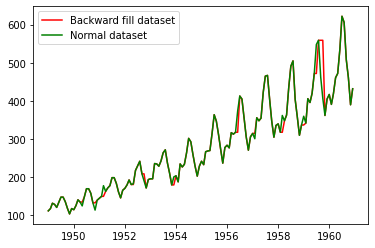

In [14]:
# Let's compare the df_copy_ffill with the main dataframe(df) to check its correlation
airline_1= df
airline_3 = df_copy_bfill
 
# Plot with differently-colored markers.
plt.plot(airline_2 , 'red', label='Backward fill dataset')
plt.plot( airline_1, 'green', label='Normal dataset')
 
# Create legend.
plt.legend(loc='upper left')

In [15]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
# "linear":Ignores the index and treat the values as equally spaced, "limit_direction":Consecutive NaNs will be filled in this direction
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [16]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward') 
# "linear":Ignores the index and treat the values as equally spaced, "limit_direction":Consecutive NaNs will be filled in this direction
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [17]:
# A moving average is a technique that can be used to smooth out time series data to reduce the “noise” in the data and more easily identify patterns and trends
# The main idea behind a moving average is to take the average of a certain number of previous periods to come up with a “moving average” for a given period.
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
# The rolling() function groups observations into a window.Window size here is 12

Text(0, 0.5, 'Passengers')

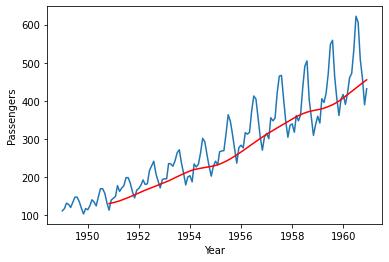

In [18]:

plt.plot(df.index, df.Passengers, '-')
plt.plot(MA.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

TIME SERIE SPECIFIC EXPLORATORY METHOD

In [19]:
import statsmodels.api as sm # statsmodels is a Python module for statistical models,conducting statistical tests and statistical data exploration.
from pylab import rcParams #pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style , All module objects starting with “rc” are a means to interact with your plot styles and settings
rcParams['figure.figsize'] = 15, 8

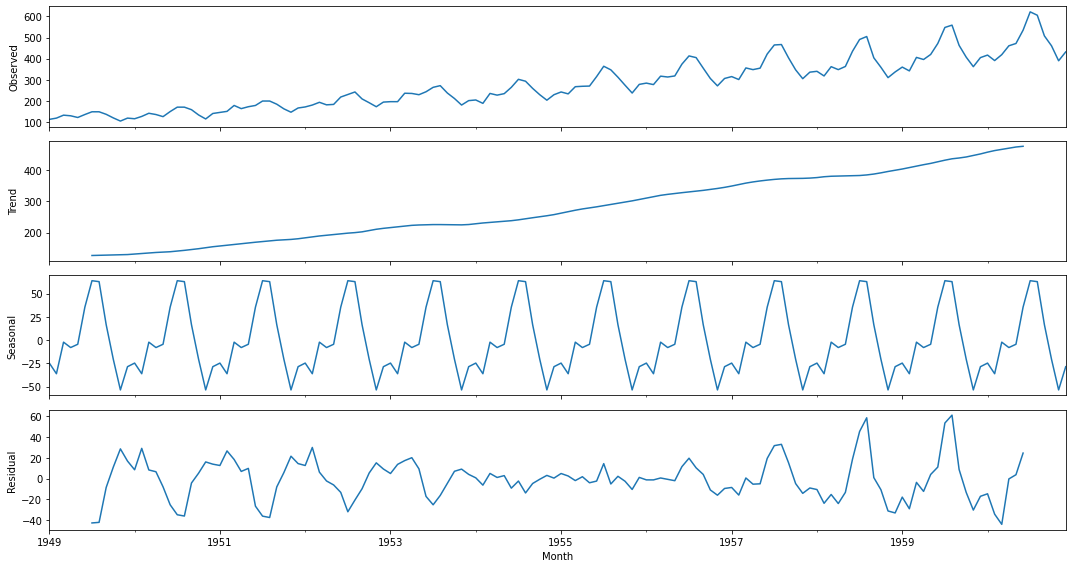

In [20]:
 decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation

Augmented Dickey Fuller test (ADF Test) is a statistical test used to test whether a given time series is stationary or not and this test is implemented via the adfuller() function.

p-value is the probability of observing a sample statistic that is at least as extreme as your sample statistic when you assume that the null hypothesis is true.

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

'Lags' kind of represents "delay", a fixed amount of passing time.

In [21]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: 0.815368879206047
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


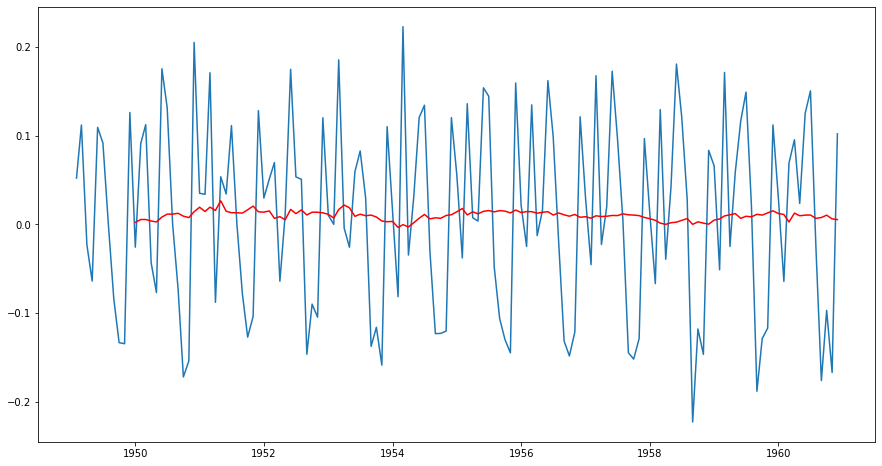

In [22]:
#From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain. #This confirms that the series is indeed non-stationary.
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [23]:
df_diff.head() # Having a look, we can see that there is a NaN value at the top

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


In [24]:
 #Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()

In [25]:
df_quarterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


In [26]:
#Upsample to daily data points
df_daily = df.resample('D').mean()

In [27]:
df_daily

,Passengers
Month,
1949-01-01,112.0
1949-01-02,NaN
1949-01-03,NaN
1949-01-04,NaN
1949-01-05,NaN
...,...
1960-11-27,NaN
1960-11-28,NaN
1960-11-29,NaN


Time Series Forecasting Using Stochastic Models

In [28]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
df_diff = df_diff.fillna(method='bfill') 
 # The code should also be enabled before the acf and pacf plotting so that it does not give a null plot.
# When we carried out our differencing to convert the non-stationary series to stationary series, a Nan value was created in the process
# Using the code fills it up using backward fill method so that it can be used for computation. Using forward fill method won't work as the first value is actually the NaN value!

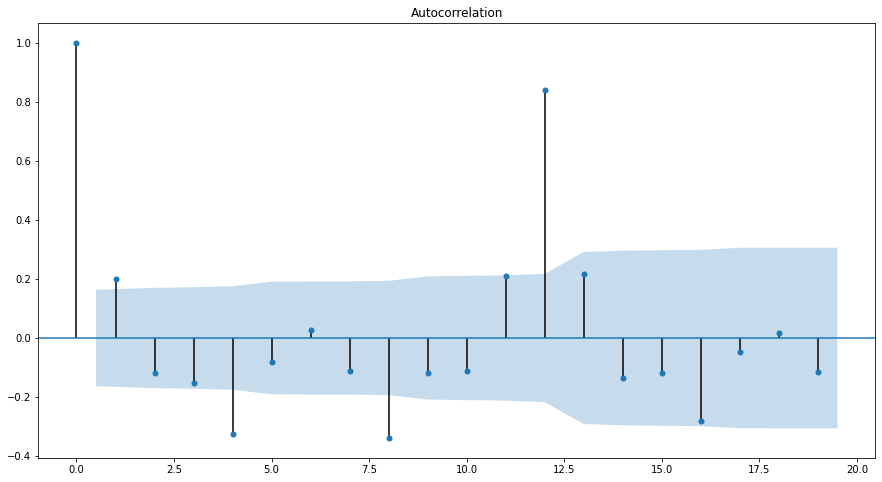

In [30]:
 #ACF - Autocorrelation Function : It measures the linear relationship between lagged values in the series
plot_acf(df_diff, lags = range(0, 20))
plt.show()

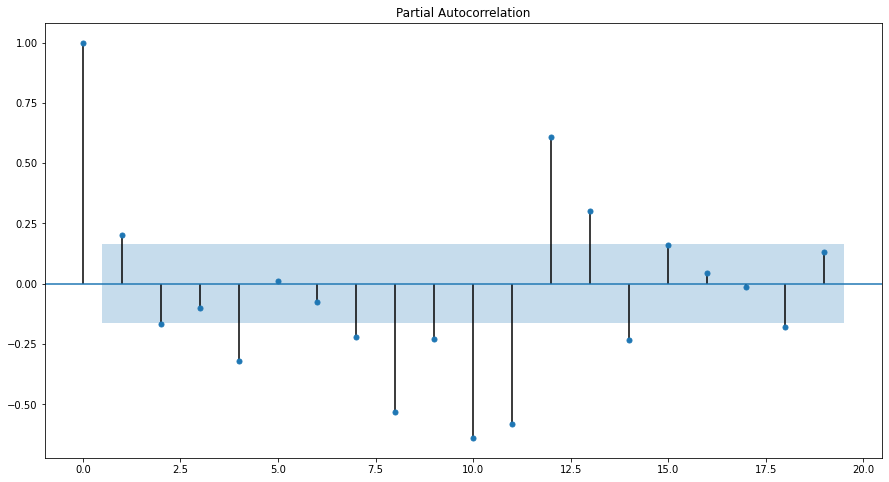

In [31]:
 #PACF - Partial Autocorrelation Function (PACF) : PACF gives the partial correlation of a stationary series with its lagged values not accounted for by prior lagged observations.
plot_pacf(df_diff, lags = range(0, 20))
plt.show()

The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively. In both plots, p=q=1.

The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively.

In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly in the PACF plot, p=2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


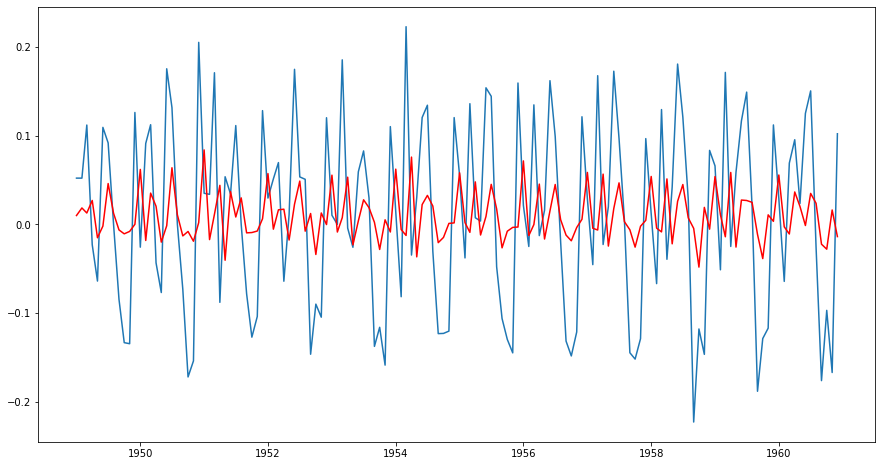

In [32]:
#AR, MA and ARIMA 
# AR - Autoregressive Model 
# MA - Moving Average Model
# ARIMA - Autoregressive Integrated Moving Average Models
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


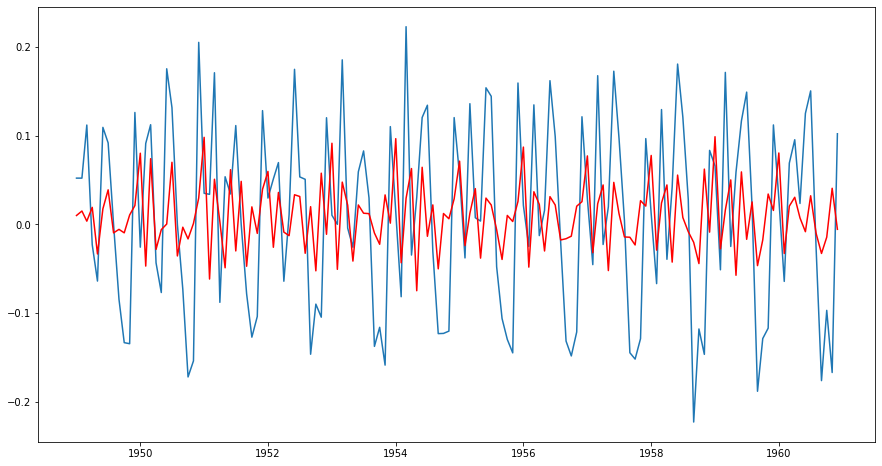

In [33]:

MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

In [34]:

from fbprophet import Prophet
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month']= pd.to_datetime(df['Month']) # Just some initial preprocessing
df = df.rename(columns={"Month": "ds", "Passengers": "y"}) # Renaming Columns to Prophet requirements
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [35]:
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,54.828866,113.434070,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,49.525704,106.147194,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,81.859043,138.492582,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.478219,135.512589,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,84.443861,138.816817,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.807353,54.828866,113.434070,106.727984,106.727984,106.727984
1,1949-02-01,78.218354,49.525704,106.147194,108.901201,108.901201,108.901201
2,1949-03-01,110.361397,81.859043,138.492582,110.864107,110.864107,110.864107
3,1949-04-01,107.851823,79.478219,135.512589,113.037323,113.037323,113.037323
4,1949-05-01,111.351735,84.443861,138.816817,115.140437,115.140437,115.140437
...,...,...,...,...,...,...,...
149,1961-05-31,533.992919,505.502363,561.450609,502.558318,502.383268,502.729830
150,1961-06-30,577.062353,548.147372,605.663828,505.571811,505.338161,505.789179
151,1961-07-31,575.495626,546.266828,604.236917,508.685754,508.385828,508.954702
152,1961-08-31,529.069236,502.502510,558.568557,511.799697,511.435149,512.125187


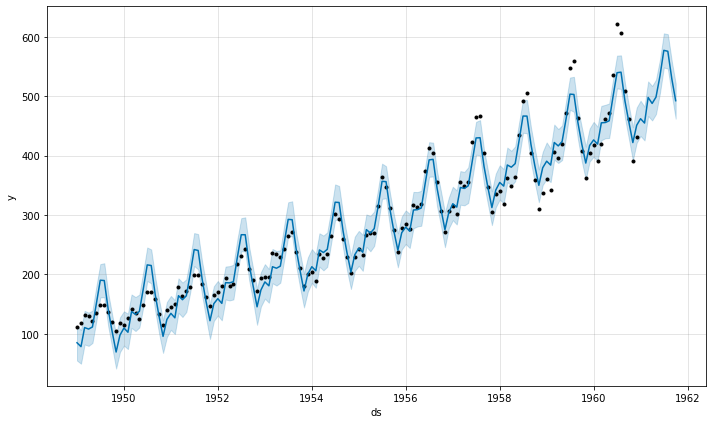

In [38]:
model.plot(forecast)
plt.show()